In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('titanic_train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#checking data for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Thus we have Age, Cabin and Embarked columns with some missing enteries.

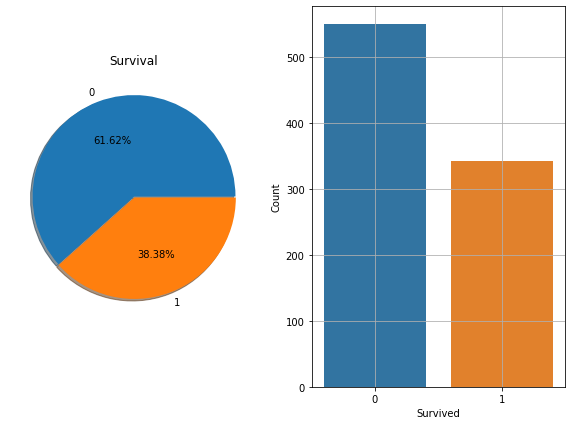

In [ ]:
#Survival Rate
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize=(10, 7))

ax[0].pie(data.Survived.value_counts(), explode=[0, 0.01], 
          autopct='%1.2f%%', shadow= True, labels=[0, 1])
ax[0].set_title('Survival')

sns.countplot('Survived', data= data, ax= ax[1])
ax[1].set_ylabel('Count')
ax[1].grid(True)

plt.show()

Thus we can see that survival rate of Titanic incident was very less. Now we will analyze different factors that was common among people who survived and who didnt.

#Analysis

Here we have different types of features.
Some are categorical features, some are ordinal(with categories which can be sorted) and then continous features.

##Sex

In [ ]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

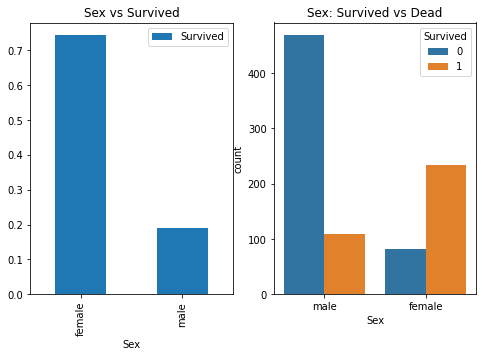

In [ ]:
#For better understanding we visualize the data
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax= ax[0])
ax[0].set_title('Sex vs Survived')

sns.countplot('Sex', hue= 'Survived', data= data, ax= ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

Thus we can see that survival rate among women was much greater than it was in men.

##Pclass

In [ ]:
pd.crosstab(data.Pclass, data.Survived, 
            margins= True).style.background_gradient(cmap= 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


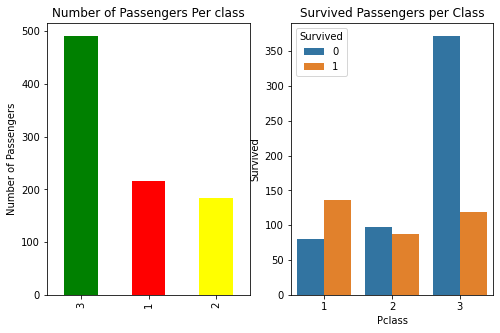

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

data['Pclass'].value_counts().plot.bar(color=['green', 'red' ,'yellow'],
                                       ax= ax[0] )
ax[0].set_title('Number of Passengers Per class')
ax[0].set_ylabel('Number of Passengers')

sns.countplot('Pclass', hue= 'Survived', data= data, ax=ax[1])
ax[1].set_title('Survived Passengers per Class')
ax[1].set_ylabel('Survived')

plt.show()

Well, clearly the priviledged ones had much better survival rate. We can clearly see, people from class 1 had much better surivial rate, compared to the ones in 3rd class.

In [ ]:
#Comparison of Pclass with Sex

pd.crosstab([data['Sex'], data['Survived']], data.Pclass)

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

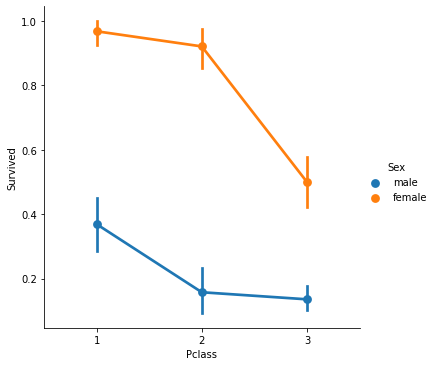

In [ ]:
sns.factorplot('Pclass', 'Survived', hue= 'Sex', data= data)
plt.show()

Thus from both factor plot and cross tab it is visible that women had much better survival rate even from different classes compared to men. Men of class 1 were given lower priority.

Thus Pclass seems to be an important feature in our analysis.

##Age

In [ ]:
print('Oldest Passenger   : {}'.format(data['Age'].max()))
print('Youngest Passenger : {}'.format(data['Age'].min()))
print('Average Passenger  : {}'.format(data['Age'].mean()))

Oldest Passenger   : 80.0
Youngest Passenger : 0.42
Average Passenger  : 29.69911764705882


In [ ]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

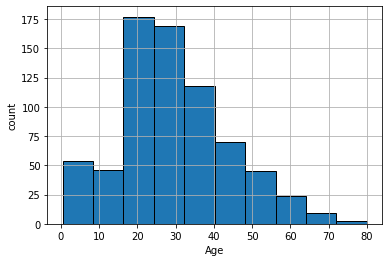

In [ ]:
plt.hist(data['Age'], edgecolor= 'black')
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

Text(0.5, 1.0, 'Sex and Age vs Survived')

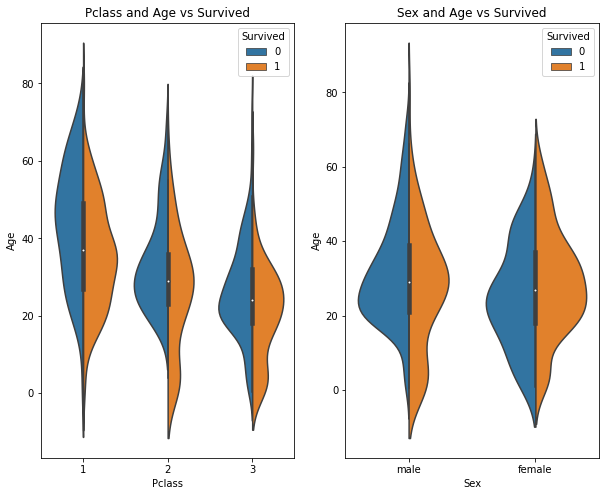

In [ ]:
"""Violin plot (these are similar to box plots but have
ability to display multinomial distribution with multiple peaks)"""

fig, ax = plt.subplots(1, 2, figsize=(10, 8))

sns.violinplot('Pclass', 'Age', hue= 'Survived', data= data
               , ax= ax[0], split= True)
ax[0].set_title('Pclass and Age vs Survived')

sns.violinplot('Sex', 'Age', hue= 'Survived', data= data,
               ax= ax[1], split= True)
ax[1].set_title('Sex and Age vs Survived')

Thus survival is common among youngester, despite the class or sex.

**Important Point:** We have 177 missing values in Age column. One way to fill them is to use mean age value.

But we also have young children, so we cannot fill their ages as mean 29. So we first have to analyze the Names and find out Mr ans Mrs. Based on that we can fill the mean ages of respective groups.

##Name

In [ ]:
data['Initial'] = 0

for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

Here we are using Regex `([A-Za-z]+)\.` to extract initials. We are trying to find strings that start with **A-Z** or **a-z** and ends with a *.*

In [ ]:
data['Initial'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

In [ ]:
pd.crosstab(data.Sex, data.Initial).style.background_gradient(cmap=
          'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


We will categorize the people based on different initial categories. Mlle Mme al belongs to Miss.

In [ ]:
data['Initial'].replace(['Capt',	'Col',	'Countess',	'Don',	'Dr',	'Jonkheer',	'Lady', 'Major',	'Master',	'Miss',	'Mlle',	'Mme',	'Mr',	'Mrs',	'Ms',	'Rev',	'Sir'],
                        ['Mr', 'Other', 'Mrs', 'Mr', 'Mr', 'Other', 'Mrs', 'Mr', 'Master',  'Miss', 'Miss', 'Miss', 'Mr', 'Mrs', 'Miss', 'Other',  'Mr'], 
                        inplace= True)

In [ ]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Other'), 'Age'] = 46

In [ ]:
data.Age.isnull().any()

False

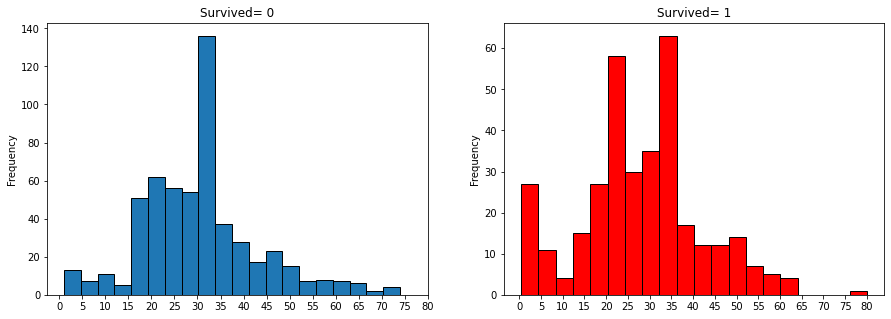

In [ ]:
fig, ax= plt.subplots(1, 2, figsize=(15, 5))

data.loc[data['Survived']==0]['Age'].plot.hist(ax=ax[0], bins= 20,
                                               edgecolor= 'black')
ax0 = list(range(0, 85, 5))
ax[0].set_title('Survived= 0')
ax[0].set_xticks(ax0)

data.loc[data['Survived']==1]['Age'].plot.hist(ax=ax[1], bins= 20,
                                              color= 'red', edgecolor= 'black')
ax1 = list(range(0, 85, 5))
ax[1].set_title('Survived= 1')
ax[1].set_xticks(ax1)

plt.show()

* Thus youngsters survived in greater number.
* Mostly death occured among people of age group of 30-45.

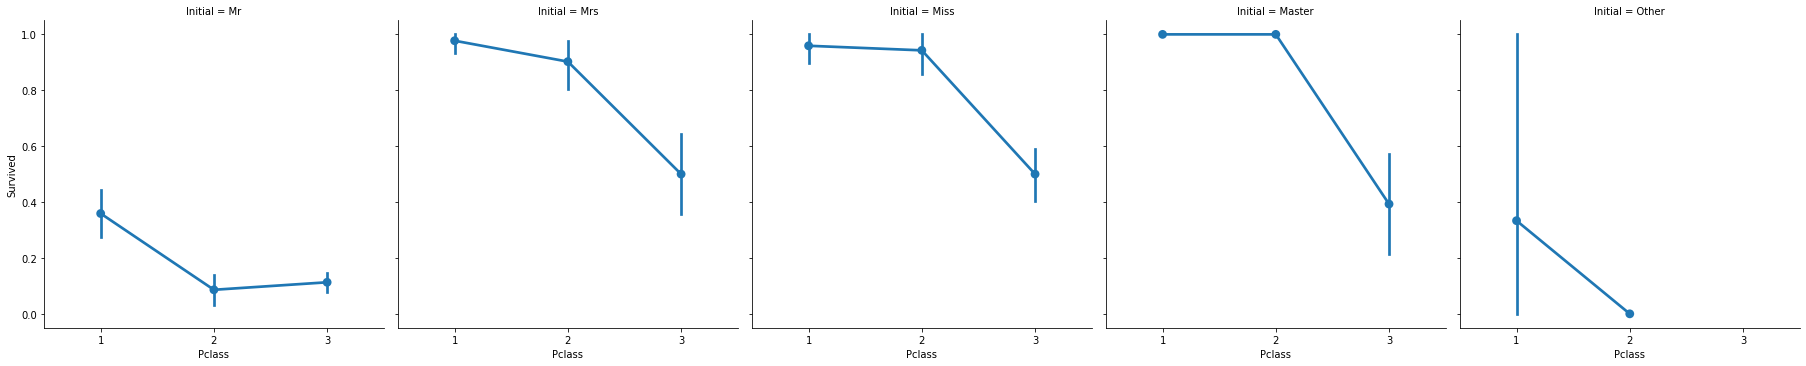

In [ ]:
sns.factorplot('Pclass', 'Survived', col='Initial', data= data)
plt.show()

Thus women and children were priority despite the class difference. Hence Age is an important feature in proving the survival.

##Embarked

In [ ]:
pd.crosstab([data['Embarked'], data['Pclass']], [data['Survived'], data['Sex']]
             , margins= True).style.background_gradient(cmap='summer_r')

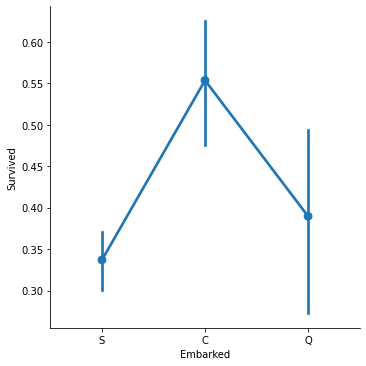

In [ ]:
sns.factorplot('Embarked', 'Survived', data= data)
plt.show()

People who embarked from port C had better survival chances than all others had.

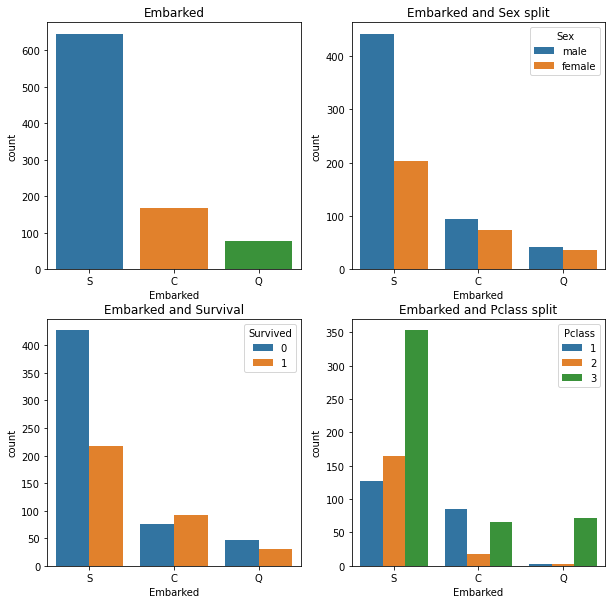

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot('Embarked', data= data, ax= ax[0, 0])
ax[0, 0].set_title('Embarked')

sns.countplot('Embarked', hue='Sex', data= data, ax= ax[0, 1])
ax[0, 1].set_title('Embarked and Sex split')

sns.countplot('Embarked', hue='Survived', data= data, ax= ax[1, 0])
ax[1, 0].set_title('Embarked and Survival')

sns.countplot('Embarked', hue='Pclass', data= data, ax= ax[1, 1])
ax[1, 1].set_title('Embarked and Pclass split')

plt.show()

* Most people who embarked were from port S.
* Only 50% people survived from S port. Compared to C and Q they had better survival ratio. 
* Most of the people coming from port S belonged to class 3. That can be one of the reason why they had poor survival chance. Because most people of Pclass 3 didnt survive comapred to Pclass 1 and 2. 


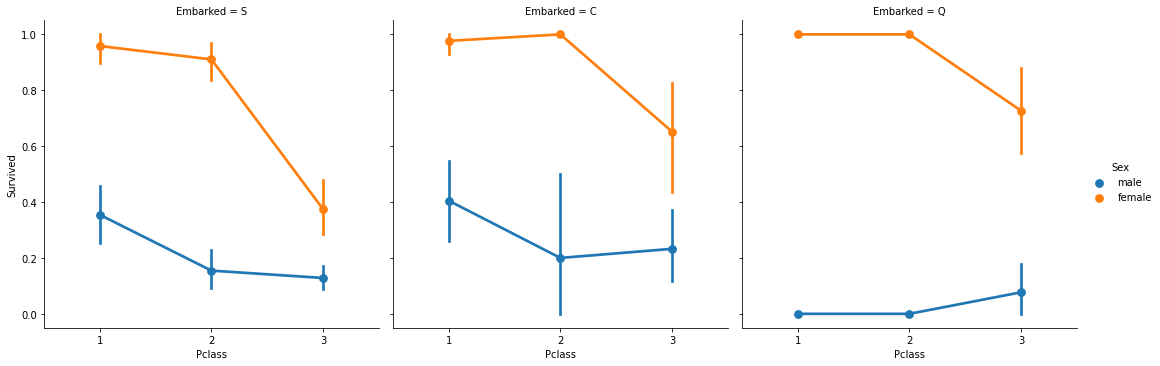

In [ ]:
sns.factorplot('Pclass', 'Survived', hue= 'Sex', col= 'Embarked', data= data)
plt.show()

* Female had better survival chances irrespective of Pclass.
* Port S was very unlcuky for both Men and women of Pclass3.
* Port Q had majority of people from class 3 and majority of men from there didnt survive. Females survived as they were given priority during rescue mission.

In [ ]:
data['Embarked'].isnull().sum()

2

In [ ]:
data['Embarked'].fillna('S', inplace= True)

In [ ]:
data['Embarked'].isnull().sum()

0

No more Nan in embarked.

##SibSp

This is Siblings and Spouses.

In [ ]:
pd.crosstab([data.SibSp], data.Survived, margins= True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


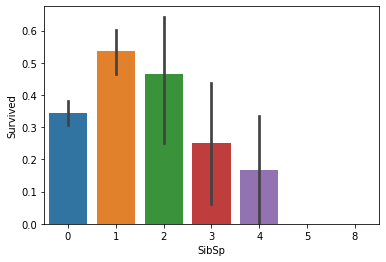

In [ ]:
sns.barplot('SibSp', 'Survived', data= data)
plt.show()

In [ ]:
pd.crosstab([data['SibSp']], data['Pclass'], margins= True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


* People who were alone had nearly 34.5% survival chnaces.
* As number of family members grew less survival chances dropped. The reason is definitely no one would leave their family alone on ship. Also as mostly families belonged to Pclass 3 so they eventually had lower survival chances.

##Parch

Parents and Childrens

In [ ]:
pd.crosstab([data['Parch']], data['Pclass'], margins= True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Parch,,,,
0,163,134,381,678
1,31,32,55,118
2,21,16,43,80
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,216,184,491,891


Thus plot shows families bought Pclass3 tickets.

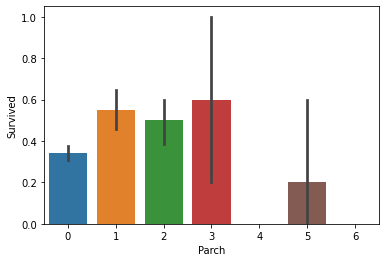

In [ ]:
sns.barplot('Parch', 'Survived', data= data)
plt.show()

So although having large families dropped survival chances, but here we dont see a fixed trend. Some with atleast 3 members survived. However from 4-6 ther was some uncertainity.

##Fare

In [ ]:
print('Highest Fare Price : {}'.format(data['Fare'].max()))
print('Lowest Fare Price  : {}'.format(data['Fare'].min()))
print('Average Fare Price : {}'.format(data['Fare'].mean()))

Highest Fare Price : 512.3292
Lowest Fare Price  : 0.0
Average Fare Price : 32.2042079685746


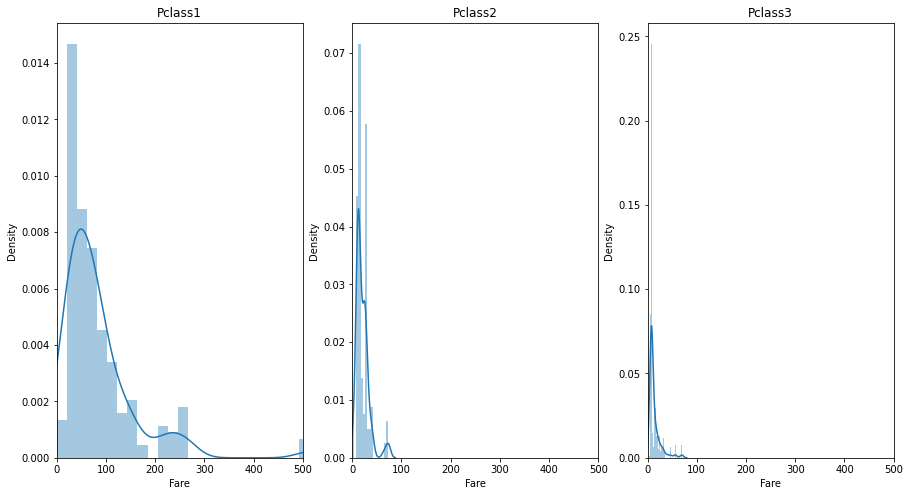

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 8))

sns.distplot(data[data['Pclass']==1].Fare, ax= ax[0])
ax[0].set_title('Pclass1')
ax[0].set_xlim([0, 500])

sns.distplot(data[data['Pclass']==2].Fare, ax= ax[1])
ax[1].set_title('Pclass2')
ax[1].set_xlim([0, 500])

sns.distplot(data[data['Pclass']==3].Fare, ax= ax[2])
ax[2].set_title('Pclass3')
ax[2].set_xlim([0, 500])

plt.show()

Variation of fares is greater in Pclass 1 than other classes. Fares are higher in class 1 as it is privileged class.

**Summarizing Features Analysis**

* **Sex:** Females had higher survival chances than males.
* **Pclass:** Passenegrs traveling in class 1 had better survival chances compared to 2 and 3. Class 3 passengers had low survival chances because rich people clearly were prioirty during rescue mission.
* **Embarked:** Port S seemed unlucky for all class of people. Most belonging to C survived. 
* **Age:** Youngsters within the range of 5-15 year had better survival. People from age 20-30 and above 35+ had less survival chances.

* **SibSp and Parch:** Those who were alone were able to survive in the accident. People with large families were not saved because of either they didnt give up their families or also because most of them belong to Pclass3 so that also seemed to be one of the reason.

##Correlation Between Features

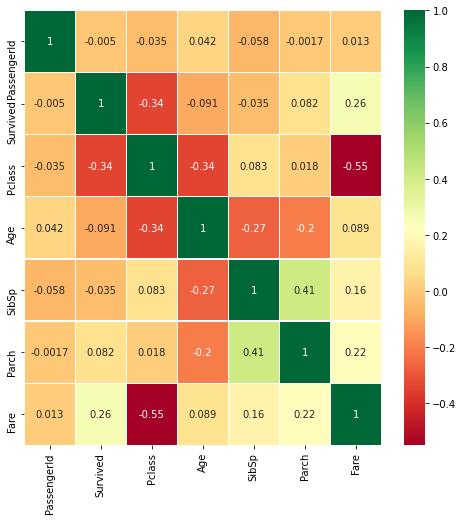

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot= True, cmap= 'RdYlGn', linewidths= 0.2)
plt.show()

**Interpretation:**
To study to what extent features are related to each other we see correlation heatmap. 

* +1 Specify positive relation(increase in one increases the other)
* -1 Specify negative relation(increase in one decreases the other)  

As we can see the max correlation is between SibSp and Parch whihc is 0.41. So our features are not highly correlated ( incase of positively correlated features we try to keep one as both are causing upward trend and have low variance in order to avoid redundancy and save space and training time ).
Here we can continue with all the features.


#Feature Engineering and Pre-Processing

Here we will try to build up more strong features from existing features. Also try to transform some features into more relevant form that can be used for model training.

##Age_band

Because age is a continous feature, we will use Binning (divide the total age range into **N** bins and make all the values between that range equal to that bin value) to categorize them.

Max person age is 80. We will divide the total range into 5 bins each of size 16.

In [ ]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32) , 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48) , 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64) , 'Age_band'] = 3
data.loc[(data['Age'] > 64) , 'Age_band'] = 4

In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


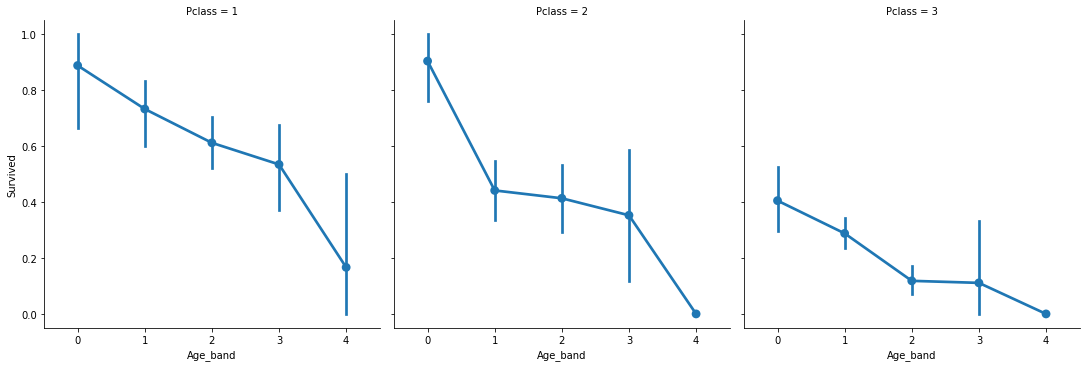

In [ ]:
sns.factorplot('Age_band', 'Survived', col='Pclass', data= data)
plt.show()

So survival rate decreases as age increases irrespective of class differences.

##Family and Alone

Family = SibSp + Parch

Alone = 1 if Family == 0 else 0

In [ ]:
data['Family'] = 0
data['Family'] = data['SibSp'] + data['Parch']
data['Alone'] = 0
data.loc[data['Family'] == 0, 'Alone'] = 1
data.loc[data['Family'] != 0, 'Alone'] = 0

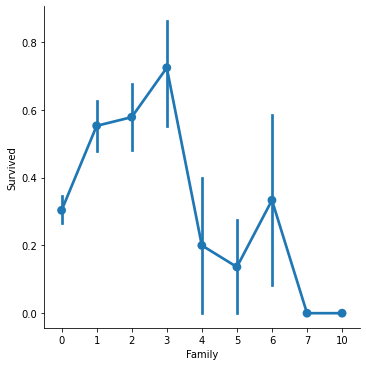

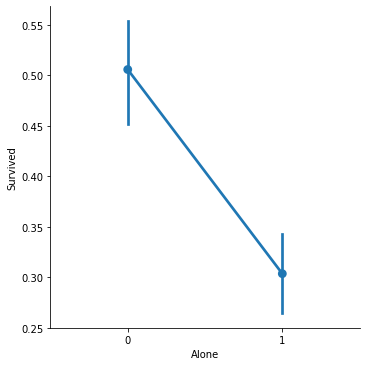

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (10, 8))

sns.factorplot('Family', 'Survived' ,data=data, ax=ax[0])
ax[0].set_title('Families Survival')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone Survival')

plt.close(1)

Both plots give us some new insights. We can see that people who were alone had poor survival chance also people with larger families. Only those with 2-3 family members had high survival chances.

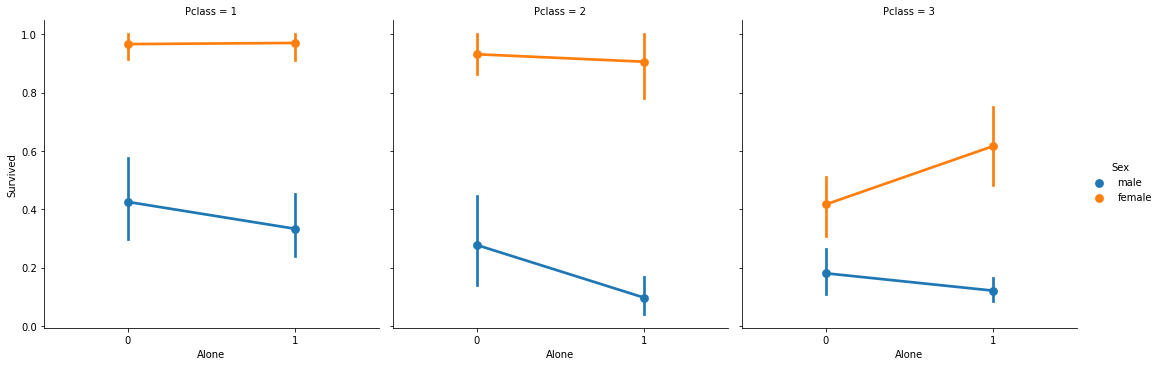

In [ ]:
sns.factorplot('Alone', 'Survived', hue='Sex', col='Pclass', data=data)
plt.show()

For Pclass1 and Pclass 2, males passengers who were alone had lower survival chances compared to females. However,  for Pclass3 passengers females who were alone had better survival chance than those with family. 

##Fare_range

As fare prices are also continous, so we try to make them discrete by using binning.

In [ ]:
data['Fare_range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Thus we can see as fare prices increases the survival probability also increases.

Now we categorize Fare_range.

In [ ]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31.0), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31.0) & (data['Fare'] <= 513), 'Fare_cat'] = 3

In [ ]:
data['Fare_cat'].value_counts()

2    229
0    223
3    222
1    217
Name: Fare_cat, dtype: int64

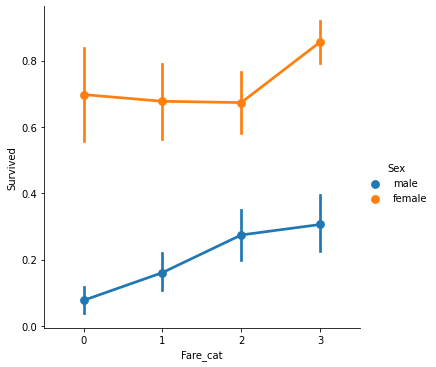

In [ ]:
sns.factorplot('Fare_cat', 'Survived', hue= 'Sex', data= data)
plt.show()

##Strings to Numerical

To process string categorical features they also have to be converted to numerical form.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
embarked_enc = LabelEncoder()
sex_enc = LabelEncoder()
initial_enc = LabelEncoder()
data['Embarked'] = embarked_enc.fit_transform(data['Embarked'])
data['Sex'] = sex_enc.fit_transform(data['Sex'])
data['Initial'] = initial_enc.fit_transform(data['Initial'])

Now we have done all the required feature engineering and preprocessing so lastly, we removing all the unnecessary features.

In [ ]:
data.drop(['Name', 'Age', 'PassengerId', 'Ticket', 'Fare', 'Fare_range', 'Cabin'], 
          axis= 1, inplace= True)

In [ ]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family,Alone,Fare_cat
0,0,3,1,1,0,2,2,1,1,0,0
1,1,1,0,1,0,0,3,2,1,0,3
2,1,3,0,0,0,2,1,1,0,1,1
3,1,1,0,1,0,2,3,2,1,0,3
4,0,3,1,0,0,2,2,2,0,1,1


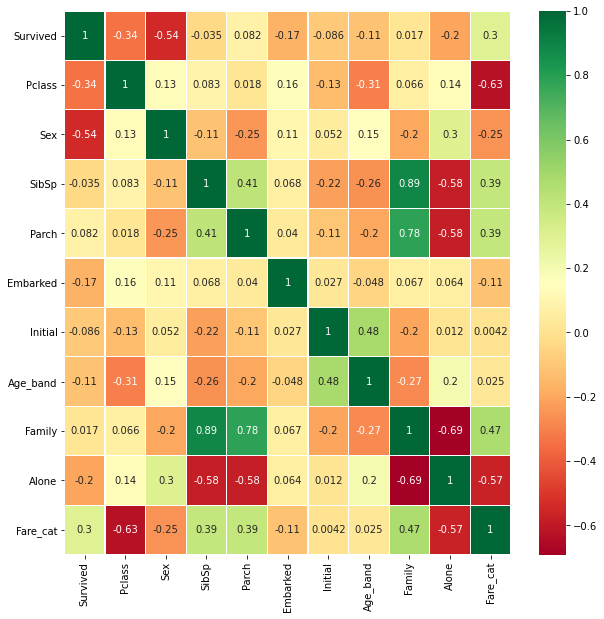

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot= True, cmap= 'RdYlGn', linewidth= 0.2)
plt.show()

#Model Training and Testing

Now we will train some best classifiers and try to achieve best possible accurate results.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xg

In [ ]:
X, y = data.values[:, 1:], data.values[:, 0]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state= 42)

##Model Training

In [ ]:
log_reg = LogisticRegression()
lin_svc_clf = SVC(kernel= 'linear', C= 0.1)
rbf_svc_clf = SVC()
tree_clf = DecisionTreeClassifier()
mlp_clf = MLPClassifier()

models = [log_reg, lin_svc_clf, rbf_svc_clf, tree_clf, mlp_clf]
names = ['Logistic Regression', 'Linear SVM Classifier', 'RBF SVM Classifier', 
         'Decision Tree Classifier', 'Multilayer Preceptron Network']

In [ ]:
for model, name in zip(models, names):
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  acc = accuracy_score(y_test, pred)
  print('The accuracy of {} model is: {}'.format(name, round(acc, 2)))

The accuracy of Logistic Regression model is: 0.82
The accuracy of Linear SVM Classifier model is: 0.78
The accuracy of RBF SVM Classifier model is: 0.83
The accuracy of Decision Tree Classifier model is: 0.8
The accuracy of Multilayer Preceptron Network model is: 0.82


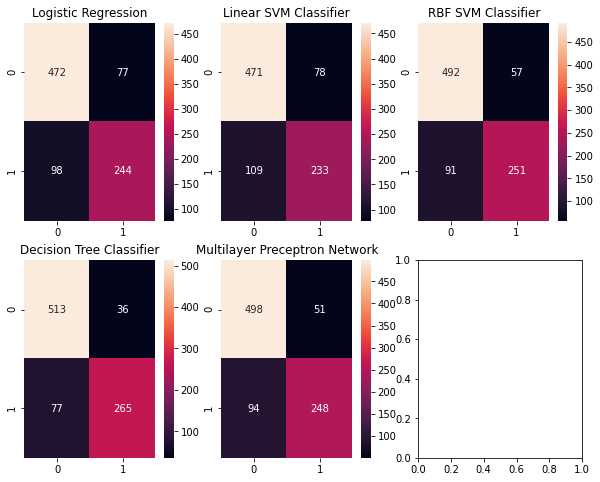

In [ ]:
#visualizing confusion matrice
fig, ax = plt.subplots(2, 3, figsize=(10, 8))
k= 0

for i in range(0, 2):
  for j in range(0, 3):
    if (k < 5):  
      y_pred = models[k].predict(X)
      sns.heatmap(confusion_matrix(y, y_pred), annot= True, fmt= '2.0f',
              ax= ax[i, j])
      ax[i , j].set_title(names[k])
      k+=1

Decision Tree Classifier works well by maximizing correct predicitons. It has although made mistakes by giving 36 false negatives and 77 false positives but we can its the only one that was able to correclty predict maximum alive people.

In [ ]:
round(accuracy_score(y, tree_clf.predict(X)), 2)

0.87

Now we try to improve the decision tree model by doing some Hyperparameter tuning.

In [ ]:
min_samples_split = list(range(10, 100))
max_leaf_nodes = list(range(5, 50))
parameters = {'min_samples_split': min_samples_split, 
              'max_leaf_nodes' : max_leaf_nodes}
gd = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, cv= 5)
gd.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,

In [ ]:
gd.best_score_

0.8327474734793798

In [ ]:
gd.best_params_

{'max_leaf_nodes': 8, 'min_samples_split': 10}

Doing hyperparameter search on SVM too.

In [ ]:
kernel = ['rbf', 'linear']
C = [0.05, 0.1, 0.2, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2] 
parameters = {'kernel': kernel, 'C': C, 'gamma': gamma}
gd2 = GridSearchCV(estimator=SVC(), param_grid= parameters, cv= 4)
gd2.fit(X, y)

GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.05, 0.1, 0.2, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7,
                               0.8, 0.9, 1],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 2],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gd2.best_score_

0.830535692643316

In [ ]:
gd2.best_params_

{'C': 0.8, 'gamma': 0.1, 'kernel': 'rbf'}

##Ensemble Methods Performance

In [ ]:
vtng_clf = VotingClassifier(estimators= [('log_reg', LogisticRegression(C=0.5)), 
                            ('tree_clf', DecisionTreeClassifier(max_leaf_nodes=8, min_samples_split=10)), 
                            ('rbf_svm_clf', SVC(kernel='rbf', C= 0.8, gamma= 0.1)), 
                            ('lin_svm_clf', SVC(kernel='linear', C=1))], voting='hard'
                            )
vtng_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=0.5, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('tree_clf',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criter...
                                  probab

In [ ]:
rndm_clf = RandomForestClassifier()
rndm_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
bgng_clf = BaggingClassifier(base_estimator=SVC(C=0.8, gamma=1), 
                          n_estimators= 20, n_jobs= -1)
bgng_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=SVC(C=0.8, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma=1, kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [ ]:
xgb_clf = xg.XGBClassifier()
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print('Accuracy of Voting Classifier       : {}'.format(accuracy_score(y_test, 
                                                 vtng_clf.predict(x_test))))
print('Accuracy of Random Forest Classifier: {}'.format(accuracy_score(y_test, 
                                                 rndm_clf.predict(x_test))))
print('Accuracy of Bagging Classifier      : {}'.format(accuracy_score(y_test, 
                                                 bgng_clf.predict(x_test))))
print('Accuracy of Xgboost Classifier      : {}'.format(accuracy_score(y_test, 
                                                 xgb_clf.predict(x_test))))


Accuracy of Voting Classifier       : 0.8161434977578476
Accuracy of Random Forest Classifier: 0.8026905829596412
Accuracy of Bagging Classifier      : 0.8071748878923767
Accuracy of Xgboost Classifier      : 0.8251121076233184


In [ ]:
max_depth = list(range(3, 10))
learning_rate = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_estimators = list(range(100, 200, 10))
booster = ['gbtree', 'gblinear']
params = {'max_depth': max_depth, 'learning_rate': learning_rate, 
          'n_estimators' : n_estimators, 'booster': booster }
gd_srch = GridSearchCV(estimator=xg.XGBClassifier(), param_grid= params, cv= 4)
gd_srch.fit(x_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                           0.7,

In [ ]:
gd_srch.best_score_

0.8368263473053892

In [ ]:
gd_srch.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 110}

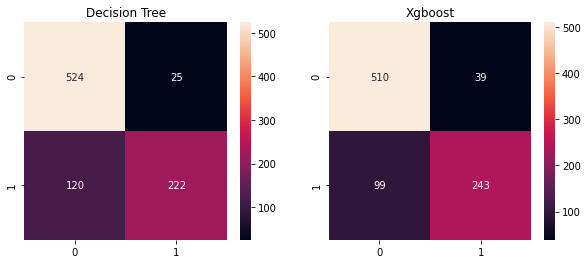

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(confusion_matrix(y, gd.best_estimator_.predict(X)), annot= True, 
            ax= ax[0], fmt= '2.0f')
ax[0].set_title('Decision Tree')

sns.heatmap(confusion_matrix(y, gd_srch.best_estimator_.predict(X)), annot= True, 
            ax= ax[1], fmt= '2.0f')
ax[1].set_title('Xgboost')
plt.show()

Thus we can see both produces very close results, where Decision Tree predicts more dead people correctly and on the other hand, Xgboost predicts more alive people correctly.